In [2]:
import pandas as pd
df = pd.read_csv('../datafiles/bike.tsv')
df.head()

,dteday\tholiday\tweekday\tworkingday\tweather_id\tcnt
0,2011-01-01\t0\t6\t0\t2\t985
1,2011-01-02\t0\t0\t0\t2\t801
2,2011-01-03\t0\t1\t1\t1\t1349
3,2011-01-04\t0\t2\t1\t1\t1562
4,2011-01-05\t0\t3\t1\t1\t1600


In [3]:
df = pd.read_csv('../datafiles/bike.tsv',sep="\t")
df.head()

,dteday,holiday,weekday,workingday,weather_id,cnt
0,2011-01-01,0,6,0,2,985
1,2011-01-02,0,0,0,2,801
2,2011-01-03,0,1,1,1,1349
3,2011-01-04,0,2,1,1,1562
4,2011-01-05,0,3,1,1,1600


In [4]:
# df2=pd.read_csv("../datafiles/weather.csv") #ファイルがshift-jisなのでエラーになる

In [5]:
weather = pd.read_csv("../datafiles/weather.csv",encoding="shift-jis")
weather

,weather_id,weather
0,1,晴れ
1,2,曇り
2,3,雨


In [6]:
temp= pd.read_json("../datafiles/temp.json")
temp.head(2)

,0,1,2,3,4,5,6,7,8,9,...,720,721,722,723,724,725,726,727,728,729
atemp,0.363625,0.353739,0.189405,0.212122,0.22927,0.233209,0.208839,0.162254,0.116175,0.150888,...,0.236113,0.259471,0.2589,0.294465,0.220333,0.226642,0.255046,0.2424,0.2317,0.223487
dteday,2011-01-01,2011-01-02,2011-01-03,2011-01-04,2011-01-05,2011-01-06,2011-01-07,2011-01-08,2011-01-09,2011-01-10,...,2012-12-22,2012-12-23,2012-12-24,2012-12-25,2012-12-26,2012-12-27,2012-12-28,2012-12-29,2012-12-30,2012-12-31


In [7]:
temp.T

,atemp,dteday,hum,temp,windspeed
0,0.363625,2011-01-01,0.805833,0.344167,0.160446
1,0.353739,2011-01-02,0.696087,0.363478,0.248539
2,0.189405,2011-01-03,0.437273,0.196364,0.248309
3,0.212122,2011-01-04,0.590435,0.2,0.160296
4,0.22927,2011-01-05,0.436957,0.226957,0.1869
...,...,...,...,...,...
725,0.226642,2012-12-27,0.652917,0.254167,0.350133
726,0.255046,2012-12-28,0.59,0.253333,0.155471
727,0.2424,2012-12-29,0.752917,0.253333,0.124383
728,0.2317,2012-12-30,0.483333,0.255833,0.350754


In [10]:
df2=df.merge(weather,how="inner",on="weather_id")
df2.head(2)

,dteday,holiday,weekday,workingday,weather_id,cnt,weather
0,2011-01-01,0,6,0,2,985,曇り
1,2011-01-02,0,0,0,2,801,曇り


In [12]:
df2.groupby("weather").mean(numeric_only=1)['cnt']

weather
晴れ    4876.786177
曇り    4052.672065
雨     1803.285714
Name: cnt, dtype: float64

In [13]:
temp=temp.T
temp.loc[199:201]

,atemp,dteday,hum,temp,windspeed
199,0.747479,2011-07-19,0.650417,0.776667,0.1306
200,0.826371,2011-07-21,0.69125,0.815,0.222021
201,None,2011-07-22,0.580417,0.848333,0.1331


In [14]:
df2[df2['dteday']=='2011-07-20']

,dteday,holiday,weekday,workingday,weather_id,cnt,weather
370,2011-07-20,0,3,1,1,4332,晴れ


In [15]:
df3 = df2.merge(temp,how="left",on="dteday")
df3[df3["dteday"]=='2011-07-20']

,dteday,holiday,weekday,workingday,weather_id,cnt,weather,atemp,hum,temp,windspeed
370,2011-07-20,0,3,1,1,4332,晴れ,NaN,NaN,NaN,NaN


<Axes: >

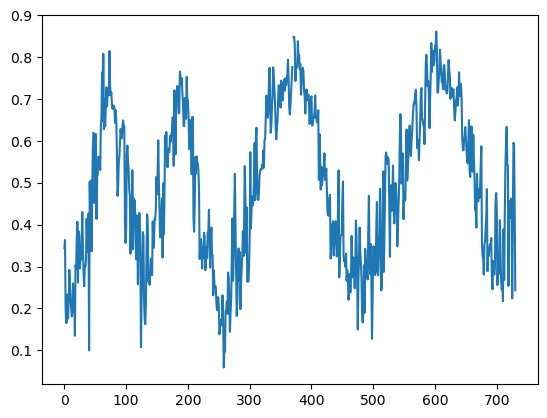

In [16]:
%matplotlib inline
df3["temp"].plot()


<Axes: >

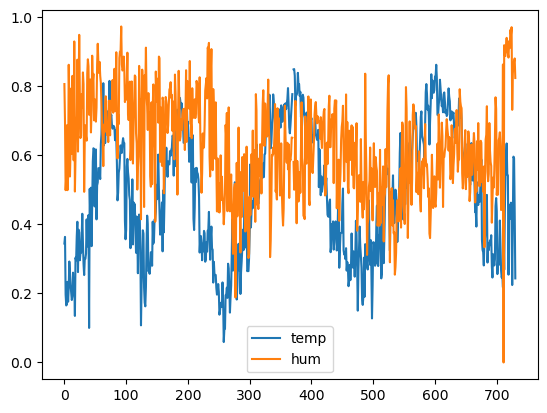

In [17]:
df3[["temp","hum"]].plot()


<Axes: ylabel='Frequency'>

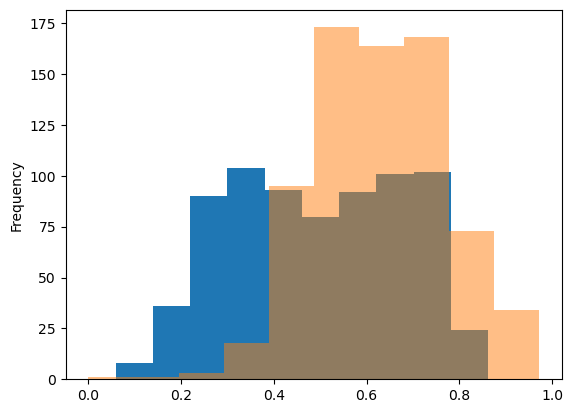

In [18]:
df3["temp"].plot(kind="hist")
df3["hum"].plot(kind="hist",alpha=0.5)


<Axes: >

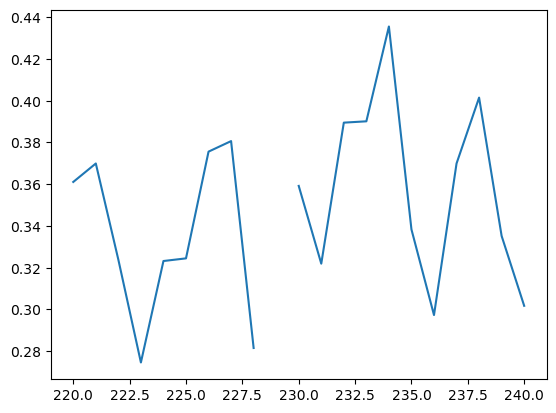

In [19]:
df3['atemp'].loc[220:240].plot(kind='line')

<Axes: >

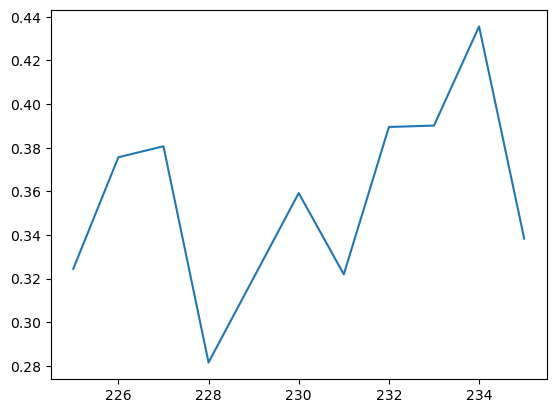

In [20]:
#atemp列のdtypeをfloatに変換
df3["atemp"] = df3["atemp"].astype(float)


df3["atemp"] =df3["atemp"].interpolate()
df3.loc[225:235,"atemp"].plot()

In [27]:
from SklModel import SklModel
from SklModel import SklModelResult
sm=SklModel()
iris_df_=sm.set_filepath("../datafiles/iris.csv") # iris_df = pd.read_csv('../datafiles/iris.csv')
non_df_ = iris_df_.dropna() # non_df = iris_df.dropna() # 欠損値を含む行を削除

# from sklearn.linear_model import LinearRegression
# x = non_df.loc[:,"がく片幅":"花弁幅" ]
# t = non_df['がく片長さ']
# model = LinearRegression()
# model.fit(x,t) # 欠損値予測のためのモデルを予測

ModuleNotFoundError: No module named 'SklModel'

### 10-17

In [29]:
iris_df = pd.read_csv('../datafiles/iris.csv')
non_df = iris_df.dropna() # 欠損値を含む行を削除


from sklearn.linear_model import LinearRegression
x = non_df.loc[:,"がく片幅":"花弁幅" ]
t = non_df['がく片長さ']
model = LinearRegression()
model.fit(x,t) # 欠損値予測のためのモデルを予測

LinearRegression()

In [30]:
# 欠損行の抜き出し
condition = iris_df['がく片長さ'].isnull()
non_data = iris_df.loc[ condition ]


# 欠損行の入力に利用する特徴量だけを抜き出して、モデルで予測
x = non_data.loc[:,"がく片幅":"花弁幅"]
pred = model.predict(x)


# 欠損行のがく片長さ(cm)のマスを抜き出して、predで代入
iris_df.loc[condition,'がく片長さ']=pred

In [31]:
from sklearn.covariance import MinCovDet

#数値列を適当に取り出す
df4=df3.loc[:,"atemp":"windspeed"]
df4=df4.dropna()#欠損値を削除

#df4に対して、各データの中心点からのマハラノビス距離を計算

mcd = MinCovDet(random_state=0,support_fraction=0.7)
mcd.fit(df4)
#マハラノビス距離
distance = mcd.mahalanobis(df4)
distance


array([5.27754434e+00, 2.95288431e+00, 4.56554287e+00, 1.11292894e+01,
       4.88709108e+00, 3.61583593e+00, 8.14460849e+00, 6.75556991e+00,
       2.87723941e+00, 5.21488750e+00, 3.79416537e+00, 5.40316379e+00,
       6.20213715e+00, 1.10553049e+01, 8.90271314e+00, 3.76946284e+00,
       9.37787119e+00, 8.19067907e+00, 9.96797528e+00, 4.96633549e+00,
       9.49019954e+00, 8.66205425e+00, 4.97595770e+00, 4.10070771e+00,
       1.69047652e+01, 6.72016281e+00, 4.26099138e+00, 1.44169140e+00,
       2.48070141e+00, 5.30852520e+00, 6.32167727e+00, 1.09093890e+01,
       4.97013012e+00, 2.46016070e+00, 8.26586093e+00, 1.55628115e+00,
       1.11467060e+01, 7.12123114e+00, 5.31412121e+00, 3.68894563e+00,
       1.91868229e+03, 4.79217095e+00, 6.04087328e+00, 1.83355572e-01,
       5.17790203e+00, 5.63622705e+00, 2.28418229e+00, 9.46535988e+00,
       6.11551425e+00, 2.28464022e+00, 1.26942361e+00, 7.86245236e+00,
       7.40873776e+00, 3.31990003e+00, 5.12019709e+00, 3.36617674e+00,
      

### 10-20

<Axes: >

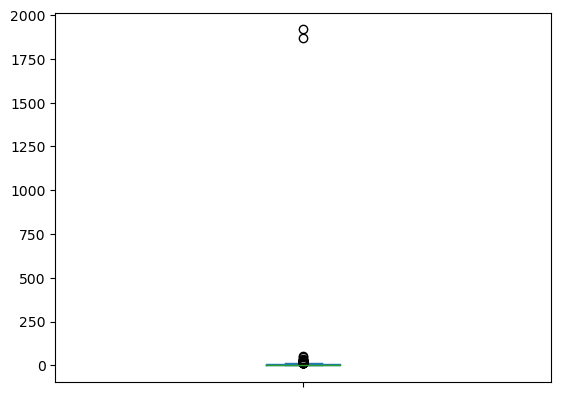

In [32]:
distance=pd.Series(distance)
distance.plot(kind="box")

### 10-21

In [33]:
tmp=distance.describe()#様々な基本統計量を計算
tmp

count     730.000000
mean       10.571304
std        98.889470
min         0.183356
25%         2.302019
50%         3.780568
75%         6.517596
max      1918.682293
dtype: float64

### 10-22

In [34]:
IQR = tmp['75%'] -tmp['25%']#IQR計算
jougen = 1.5*(IQR) + tmp['75%'] # 上限値
kagen = tmp['25%'] -1.5*(IQR) # 下限値

# 上限と下限の条件をもとに、シリーズで条件検索
outliner = distance[ (distance > jougen) | (distance < kagen) ]
outliner

24       16.904765
40     1918.682293
73       55.357957
81       15.463534
84       18.971056
91       23.001774
92       45.588676
94       15.758195
96       13.702627
130      12.903433
131      13.343114
147      14.180961
203      18.506569
218      14.180812
240      14.623922
243      22.325451
251      30.503908
253      17.347400
254      18.559749
257      23.277609
259      14.843623
264      13.075809
267      21.425291
272      14.908148
277      32.693499
286      16.683825
293      13.484822
375      13.154613
424      16.419222
473      14.412725
474      30.488845
480      18.619394
484      21.011948
497      38.434241
506      27.044165
515      24.183972
536      13.034591
544      13.592724
629    1867.324064
691      21.181155
706      24.551635
708      18.009731
709      20.933194
710      25.115724
711      14.380396
712      13.419876
713      12.949065
714      14.051767
715      27.473939
718      30.054611
724      14.980544
728      15.933540
729      23.

### 練習

In [85]:
# code10-1
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
 
RANDOM = 8
 
df = pd.read_csv('../datafiles/bike.tsv',sep="\t")
temp= pd.read_json("../datafiles/temp.json")
temp=temp.T
# print([temp.isnull().any(axis=1)])
# print(temp[~df.notna().all(axis=1)])
# print(temp[temp.isna().any(axis=1)].index)


# weather = pd.read_csv("../datafiles/weather.csv", encoding='cp932')
# df2=df.merge(weather,how="inner",on="weather_id")
 
# df3 = df.merge(temp,how="left",on="dteday").dropna()
# 線形補完は.dropna()を行わない
# df3 = df.merge(temp,how="left",on="dteday").dropna()

df3 = df.merge(temp,how="left",on="dteday")

# 欠損値の線形補完 -#---------#---------#---------#---------#---------#-
# print(temp[temp.isna().any(axis=1)]) #欠損列を抽出
# print(temp.loc[200:202],temp.loc[698:700]) #欠損値の前後を抽出
# print(type(temp["atemp"][201])) #classがNoneである事を確認
# temp["atemp"] = temp["atemp"].astype(float) #atemp列のdtypeをfloatに変換
# temp["atemp"]=temp["atemp"].interpolate() #線形補完
# print(temp.loc[200:202],temp.loc[698:700])
#---------#---------#---------#---------#---------#---------#---------#-

print(df3[df3.isna().any(axis=1)]) #欠損列を抽出
inter_col = ["atemp","hum","temp","windspeed"]
df3[inter_col] = df3[inter_col].astype(float)
df3[inter_col] = df3[inter_col].interpolate()
#---------#---------#---------#---------#---------#---------#---------#-


# データを学習とテストに分離
train,test = train_test_split(df3,test_size=0.2,random_state=RANDOM)

# 学習に使用する列を定義
columns = [
    "holiday",
    "weekday",
    "workingday",
    "weather_id",
    "atemp",
    "hum",
#      "temp",
    "windspeed"
    ]  
x = train.loc[:,columns ]
y = train[['cnt']]
 
model = LinearRegression()
model.fit(x,y) # 欠損値予測のためのモデルを予測
print('val:',model.score(x, y))
 
x_test = test.loc[:,columns].astype('float')
y_test = test[['cnt']]
model.score(x_test, y_test)
print('test:',model.score(x_test, y_test))


         dteday  holiday  weekday  workingday  weather_id   cnt atemp  \
200  2011-07-20        0        3           1           1  4332   NaN   
202  2011-07-22        0        5           1           1  3387  None   
700  2012-12-01        0        6           0           2  5191  None   

          hum      temp windspeed  
200       NaN       NaN       NaN  
202  0.580417  0.848333    0.1331  
700  0.806667  0.298333  0.059704  
val: 0.4781097831206078
test: 0.47948862222084954


In [ ]:

x = train.loc[:,columns ].astype('float')
# x2 多項式特徴量
x['atemp2'] = x['atemp']*x['atemp']
x['weather_id2'] = x['weather_id']*x['weather_id']
x['windspeed2'] = x['windspeed']*x['windspeed']
# x3 多項式特徴量
x['atemp3'] = x['atemp']*x['atemp']*x['atemp']
x['weather_id3'] = x['weather_id']*x['weather_id']*x['weather_id']
x['windspeed3'] = x['windspeed']*x['windspeed']*x['windspeed']
y = train[['cnt']]
 
# x_train, x_val, y_train, y_val = train_test_split(x, t,
#     test_size = 0.2, random_state = RANDOM)
 
model = LinearRegression()
model.fit(x,y) # 欠損値予測のためのモデルを予測
print('val:',model.score(x, y))
 
x_test = test.loc[:,columns].astype('float')
# 多項式特徴量
x_test['atemp2'] = x_test['atemp']*x_test['atemp']
x_test['weather_id2'] = x_test['weather_id']*x_test['weather_id']
x_test['windspeed2'] = x_test['windspeed']*x_test['windspeed']
# 多項式特徴量
x_test['atemp3'] = x_test['atemp']*x_test['atemp']*x_test['atemp']
x_test['weather_id3'] = x_test['weather_id']*x_test['weather_id']*x_test['weather_id']
x_test['windspeed3'] = x_test['windspeed']*x_test['windspeed']*x_test['windspeed']
y_test = test[['cnt']]
print('test: ',model.score(x_test, y_test))

In [42]:
df3.isnull().sum()

# %matplotlib inline
# df3["temp"].plot()
# df3['temp'].loc[220:240].plot(kind='line')


dteday        0
holiday       0
weekday       0
workingday    0
weather_id    0
cnt           0
atemp         0
hum           0
temp          0
windspeed     0
dtype: int64

In [ ]:
# 演習問題

In [ ]:
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
%matplotlib inline

In [ ]:
df = pd.read_csv('../datafiles/Bank.csv')
print(df.shape)
df.head()

(27128, 16)


,id,age,job,marital,education,default,amount,housing,loan,contact,day,month,duration,campaign,previous,y
0,1,39,blue-collar,married,secondary,no,1756.0,yes,no,cellular,3,apr,370.055237,1,0,1
1,2,51,entrepreneur,married,primary,no,1443.0,no,no,cellular,18,feb,233.998933,10,0,1
2,3,36,management,single,tertiary,no,436.0,no,no,cellular,13,apr,NaN,1,2,0
3,4,63,retired,married,secondary,no,474.0,no,no,cellular,25,jan,252.525808,1,0,0
4,5,31,management,single,tertiary,no,354.0,no,no,cellular,30,apr,NaN,1,2,0


In [ ]:
# まず、ダミー変数化をしたいが、文字列の列が複数あるので抜き出す。
str_col_name=['job','default','marital','education','housing','loan','contact','month']
str_df = df[str_col_name]
#複数列を一気にダミー変数化
str_df2=pd.get_dummies(str_df,drop_first=True)

num_df = df.drop(str_col_name,axis=1)#数値列を抜き出す
df2 = pd.concat([num_df,str_df2,str_df],axis=1)#結合(今後の集計の利便性も考慮してstr_dfも結合しておく)

In [ ]:
#訓練&検証データとテストデータに分割
train_val,test = train_test_split(df2,test_size=0.1,random_state=9)
train_val.head()

,id,age,amount,day,duration,campaign,previous,y,job_blue-collar,job_entrepreneur,...,month_oct,month_sep,job,default,marital,education,housing,loan,contact,month
13378,13379,46,0.0,10,378.293875,1,0,1,0,0,...,0,0,unemployed,no,married,tertiary,yes,no,cellular,jul
3800,3801,41,-333.0,30,300.845752,3,2,0,1,0,...,0,0,blue-collar,no,divorced,secondary,yes,no,cellular,jan
10398,10399,30,5389.0,6,159.053623,3,0,1,0,0,...,0,0,management,no,single,tertiary,no,no,cellular,aug
23401,23402,39,255.0,5,334.802583,1,0,0,0,0,...,0,0,management,no,single,tertiary,yes,no,sending _document,may
26223,26224,47,33.0,5,NaN,1,0,1,0,0,...,0,0,services,no,single,secondary,yes,no,cellular,may


In [ ]:
#欠損値の確認
is_nan=train_val.isnull().sum()
#欠損が存在している列だけ表示
is_nan[is_nan>0]

duration    6331
dtype: int64

In [ ]:
# 改善案1  欠損値の補完方法を線形回帰で行ってみる。

In [ ]:
train_val.corr()['duration'].map(abs).sort_values(ascending=False)

duration                     1.000000
housing_yes                  0.556899
loan_yes                     0.372579
y                            0.277575
age                          0.207738
month_aug                    0.187310
month_may                    0.184593
marital_single               0.164614
previous                     0.143538
marital_married              0.115429
job_student                  0.107913
contact_sending _document    0.087863
education_tertiary           0.081769
job_blue-collar              0.080727
month_jun                    0.065998
month_oct                    0.052855
job_unknown                  0.046328
job_management               0.045735
job_unemployed               0.044179
month_mar                    0.043775
job_housemaid                0.039184
education_secondary          0.033989
job_retired                  0.033277
month_sep                    0.032082
amount                       0.030532
day                          0.023779
job_services

In [ ]:
#特徴量の当たりがついた
#しかし、そもそもこの線形回帰は外れ値の影響を強く受けるので調べる。
num_df=train_val.drop(str_col_name,axis=1)
num_df=num_df.drop('id',axis=1)
num_df2=num_df.dropna()
mcd2 =MinCovDet(random_state=0,support_fraction=0.7)
mcd2.fit(num_df2)

MinCovDet(random_state=0, support_fraction=0.7)

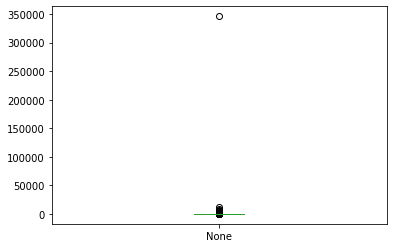

In [ ]:
dis =mcd2.mahalanobis(num_df2)
dis=pd.Series(dis)
dis.plot(kind="box")

In [ ]:
print(dis[0:3])#先頭は0番からのラベル
no=dis[dis>300000].index
no[0]

0    30.914718
1    78.512220
2    32.620429
dtype: float64


2561

In [ ]:
#先頭から2561番目が外れ値となる事が分かったので９章の付録で紹介したilocを利用する
no=num_df2.iloc[no[0]:(no[0]+1),:].index
train_val2 = train_val.drop(no)

In [ ]:
train_val2.corr()['duration'].map(abs).sort_values(ascending=False)

duration                     1.000000
housing_yes                  0.559269
loan_yes                     0.374871
y                            0.279582
age                          0.208929
month_aug                    0.188017
month_may                    0.186111
marital_single               0.165022
marital_married              0.115441
job_student                  0.108389
previous                     0.102252
contact_sending _document    0.088832
education_tertiary           0.083440
job_blue-collar              0.081568
month_jun                    0.066075
month_oct                    0.053041
job_management               0.047512
job_unknown                  0.046511
job_unemployed               0.044287
month_mar                    0.043928
job_housemaid                0.039260
education_secondary          0.034967
job_retired                  0.033636
month_sep                    0.032166
amount                       0.030493
day                          0.022636
job_services

In [ ]:
#monthはdurationに本質的に影響あるとは思えないので特徴量を
#housing_yes ,loan_yes,age,marital_single ,job_student    とする。（ｙは最終的な正解データなので除外）    

In [ ]:
#欠損行を削除
not_nan_df = train_val2.dropna()
temp_t =not_nan_df['duration']
temp_x = not_nan_df[['housing_yes','loan_yes','age','marital_single' ,'job_student']]
# 線形回帰
from sklearn.linear_model import LinearRegression
model_liner = LinearRegression()

a,b,c,d= train_test_split(temp_x,temp_t,random_state=0,test_size=0.2)

#今回は予測させたいだけなので、標準化はしない
model_liner.fit(a,c)
print(model_liner.score(a,c),model_liner.score(b,d))

0.7271253237617876 0.7154980171805083


In [ ]:
# コード修正(不要なので削除)
# tain_val2 = train_val.copy()

is_null=train_val2['duration'].isnull()
non_x=train_val2.loc[is_null,['housing_yes','loan_yes','age','marital_single','job_student']]
pred_d = model_liner.predict(non_x)
train_val2.loc[is_null,'duration']=pred_d

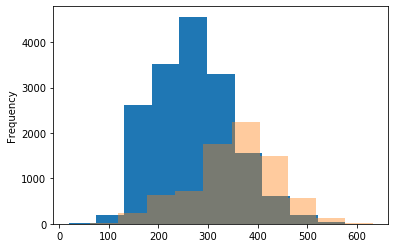

In [ ]:
#ヒストグラムの確認
train_val2.loc[train_val['y']==0,"duration"].plot(kind="hist")
train_val2.loc[train_val['y']==1,"duration"].plot(kind="hist",alpha=0.4)

#y=1の方が、durationが大きい傾向がやっぱりありそう

In [ ]:
#まず、さくっと学習できるようなlearn関数を定義する。
def learn(x,t,i):
    x_train,x_val,y_train,y_val = train_test_split(x,t,test_size=0.2,random_state=13)

    datas=[x_train,x_val,y_train,y_val]
    #不均衡データに対応できるように、class_weight引数も設定
    model = tree.DecisionTreeClassifier(random_state=i,max_depth=i,class_weight='balanced')
    model.fit(x_train,y_train)
    train_score=model.score(x_train,y_train)
    
    
    val_score=model.score(x_val,y_val)
    return train_score,val_score,model,datas

In [ ]:
t =train_val2['y']
x = train_val2.drop(str_col_name,axis=1)
x =x.drop(['id','y','day'],axis=1)

In [ ]:
#とりあえず、for文で様々な木の深さでの正解率を調べてみる
for i in range(1,15):
    s1,s2,model,datas = learn(x,t,i)
    print(i,s1,s2)

1 0.7436383185704777 0.7651034200286709
2 0.674517433823153 0.6807290600040958
3 0.7416926936664789 0.7569117345893918
4 0.6975065280835595 0.7034609870980955
5 0.7592545184578363 0.7653082121646528
6 0.7422047002201628 0.745033790702437
7 0.7774307511136143 0.7773909481875896
8 0.8082535456453842 0.7939791112021298
9 0.822180123905586 0.7995084988736433
10 0.843377195228099 0.8038091337292648
11 0.8586349905278787 0.7970509932418595
12 0.8745071936920793 0.7898832684824902
13 0.8950386564948032 0.792545566250256
14 0.909374839997952 0.7896784763465083


In [ ]:
#テストデータでも調べる
test2 = test.copy()
isnull=test2['duration'].isnull()
model_tree=tree.DecisionTreeClassifier(random_state=10,max_depth=10,class_weight="balanced")
if isnull.sum()>0:
    temp_x=test2.loc[isnull,['housing_yes','loan_yes','age','marital_single','job_student']]
    pred_d = model_liner.predict(temp_x)
    test2.loc[isnull,'duration']=pred_d
x_test = test2.drop(str_col_name,axis=1)
x_test =x_test.drop(['id','y','day'],axis=1)
y_test = test['y']

model.score(x_test,y_test)

0.7795798009583487

In [ ]:
#9章の最後より若干低下している

In [ ]:
#どのような間違い方をしているのか確認
s1,s2,model,datas = learn(x,t,9)

#訓練データでの予測結果と実際の値の2軸で個数集計flagがFalseならば、検証データで集計
def syuukei(model,datas,flag=False):
    if flag:
        pre=model.predict(datas[0])
        y_val=datas[2]
    else:
        pre=model.predict(datas[1])
        y_val=datas[3]
    data={
        "pred":pre,
        "true":y_val
    }
    tmp=pd.DataFrame(data)
    return tmp,pd.pivot_table(tmp,index="true",columns="pred",values="true",aggfunc=len)
tmp,a=syuukei(model,datas,False)
a

pred,0,1
true,,
0,2630,716
1,263,1274


In [ ]:
#訓練データと検証データの間違い型の傾向を調べる

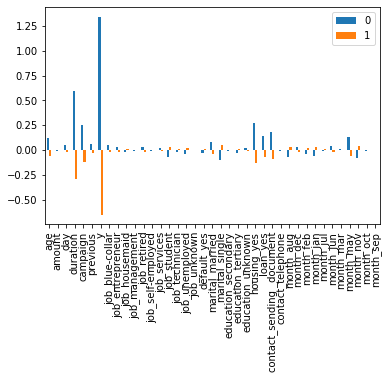

In [ ]:
#値にばらつきが大きいので、標準化してもう一度グラフ化
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
tmp2=train_val2.drop(str_col_name,axis=1)
sc_data = sc.fit_transform(tmp2)
sc_df = pd.DataFrame(sc_data,columns=tmp2.columns,index=tmp2.index)

######挿入箇所#######
pre = model.predict(sc_df.drop(["id","day","y"],axis=1))
target = tmp2["y"]
true = (pre == target)
false = (pre!= target)
############

true_df=sc_df.loc[true]
false_df=sc_df.loc[false]
true_df
temp2=pd.concat([false_df.mean()["age":],true_df.mean()["age":]],axis=1)
temp2.plot(kind="bar")

In [ ]:
print(train_val2.groupby('loan')['y'].mean())
print(train_val2.groupby('housing')['y'].mean())

loan
no     0.300210
yes    0.424328
Name: y, dtype: float64
housing
no     0.217959
yes    0.400940
Name: y, dtype: float64


In [ ]:
train_val3=train_val2.copy()
train_val3['du*hou']=train_val3['duration']*train_val3['housing_yes']
train_val3['du*loan']=train_val3['duration']*train_val3['loan_yes']
train_val3['du*age']=train_val3['duration']*train_val3['age']

In [ ]:
t =train_val3['y']

monthcol=['month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep']
jobcol=['job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown']
x = train_val3.drop(str_col_name,axis=1)
x = x.drop(jobcol,axis=1)

x = x.drop(monthcol,axis=1)
x =x.drop(['id','y','day'],axis=1)
x.columns

Index(['age', 'amount', 'duration', 'campaign', 'previous', 'job_blue-collar',
       'default_yes', 'marital_married', 'marital_single',
       'education_secondary', 'education_tertiary', 'education_unknown',
       'housing_yes', 'loan_yes', 'contact_sending _document',
       'contact_telephone', 'du*hou', 'du*loan', 'du*age'],
      dtype='object')

In [ ]:
#とりあえず、for文で様々な木の深さでの正解率を調べてみる
for i in range(5,15):
    s1,s2,model,datas = learn(x,t,i)
    print(i,s1,s2)

5 0.7585377092826788 0.7648986278926889
6 0.7422559008755312 0.7440098300225272
7 0.7811171983001383 0.7792340774114274
8 0.8061543187752803 0.7876305549866885
9 0.8266857815780042 0.8007372516895351
10 0.8406635604935743 0.7974605775138235
11 0.8545901387537761 0.7915216055703461
12 0.8781936408786033 0.8009420438255171
13 0.8983666990937484 0.8001228752815892
14 0.9141365009472121 0.7958222404259676


In [ ]:
s1,s2,model,datas = learn(x,t,9)
tmp,a=syuukei(model,datas,False)
a

pred,0,1
true,,
0,2651,695
1,278,1259


In [ ]:
pd.Series(model.feature_importances_,index=x.columns)

age                          0.102724
amount                       0.019166
duration                     0.511794
campaign                     0.141382
previous                     0.012435
job_blue-collar              0.000417
default_yes                  0.001353
marital_married              0.001846
marital_single               0.001907
education_secondary          0.002046
education_tertiary           0.001379
education_unknown            0.000689
housing_yes                  0.024460
loan_yes                     0.018960
contact_sending _document    0.019214
contact_telephone            0.000298
du*hou                       0.039863
du*loan                      0.044072
du*age                       0.055996
dtype: float64

In [ ]:
i=9
model = tree.DecisionTreeClassifier(random_state=i,max_depth=i,class_weight="balanced")
model.fit(x,t)

DecisionTreeClassifier(class_weight='balanced', max_depth=9, random_state=9)

In [ ]:
#テストデータでも調べる
test2 = test.copy()
isnull=test['duration'].isnull()
if isnull.sum()>0:
    temp_x=test2.loc[isnull,['housing_yes','loan_yes','age','marital_single','job_student']]
    pred_d = model_liner.predict(temp_x)
    test2.loc[isnull,'duration']=pred_d

test2['du*hou']=test2['duration']*test2['housing_yes']
test2['du*loan']=test2['duration']*test2['loan_yes']
test2['du*age']=test2['duration']*test2['age']

x_test = test2.drop(str_col_name,axis=1)
x_test = x_test.drop(jobcol,axis=1)
x_test = x_test.drop(monthcol,axis=1)
x_test =x_test.drop(['id','y','day'],axis=1)
y_test = test['y']
x_test.columns
model.score(x_test,y_test)

0.7917434574272023

In [ ]:
# 直観的に考えて、9章では、housingとloanで集計しており、今回の線形回帰では、それらの列も含まれているから、
# durationの性能はよりよくなるはず、でも全体のモデルの正解率は1%ほど低下している

#原因の仮説⇒ １．現状の線形回帰だと訓練&検証に過学習してしまい、テストデータにフィットしない。
                 #（そもそもテストデータではdurationがあまり関係していない？？）
#            2. 純粋な決定木の限界？

#            3. 現在考慮していない特徴量ももっとしっかりした方が良いのか？？

#次以降の章で仮説1,2について検討できるので、次章に続く。